Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..355].


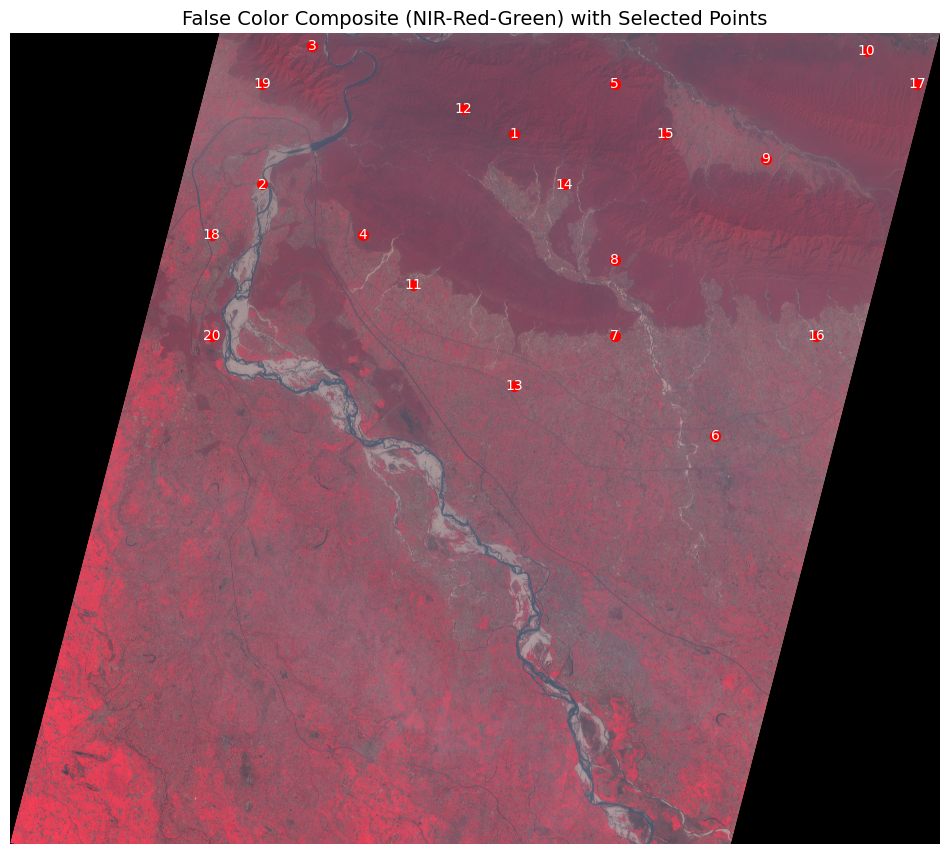

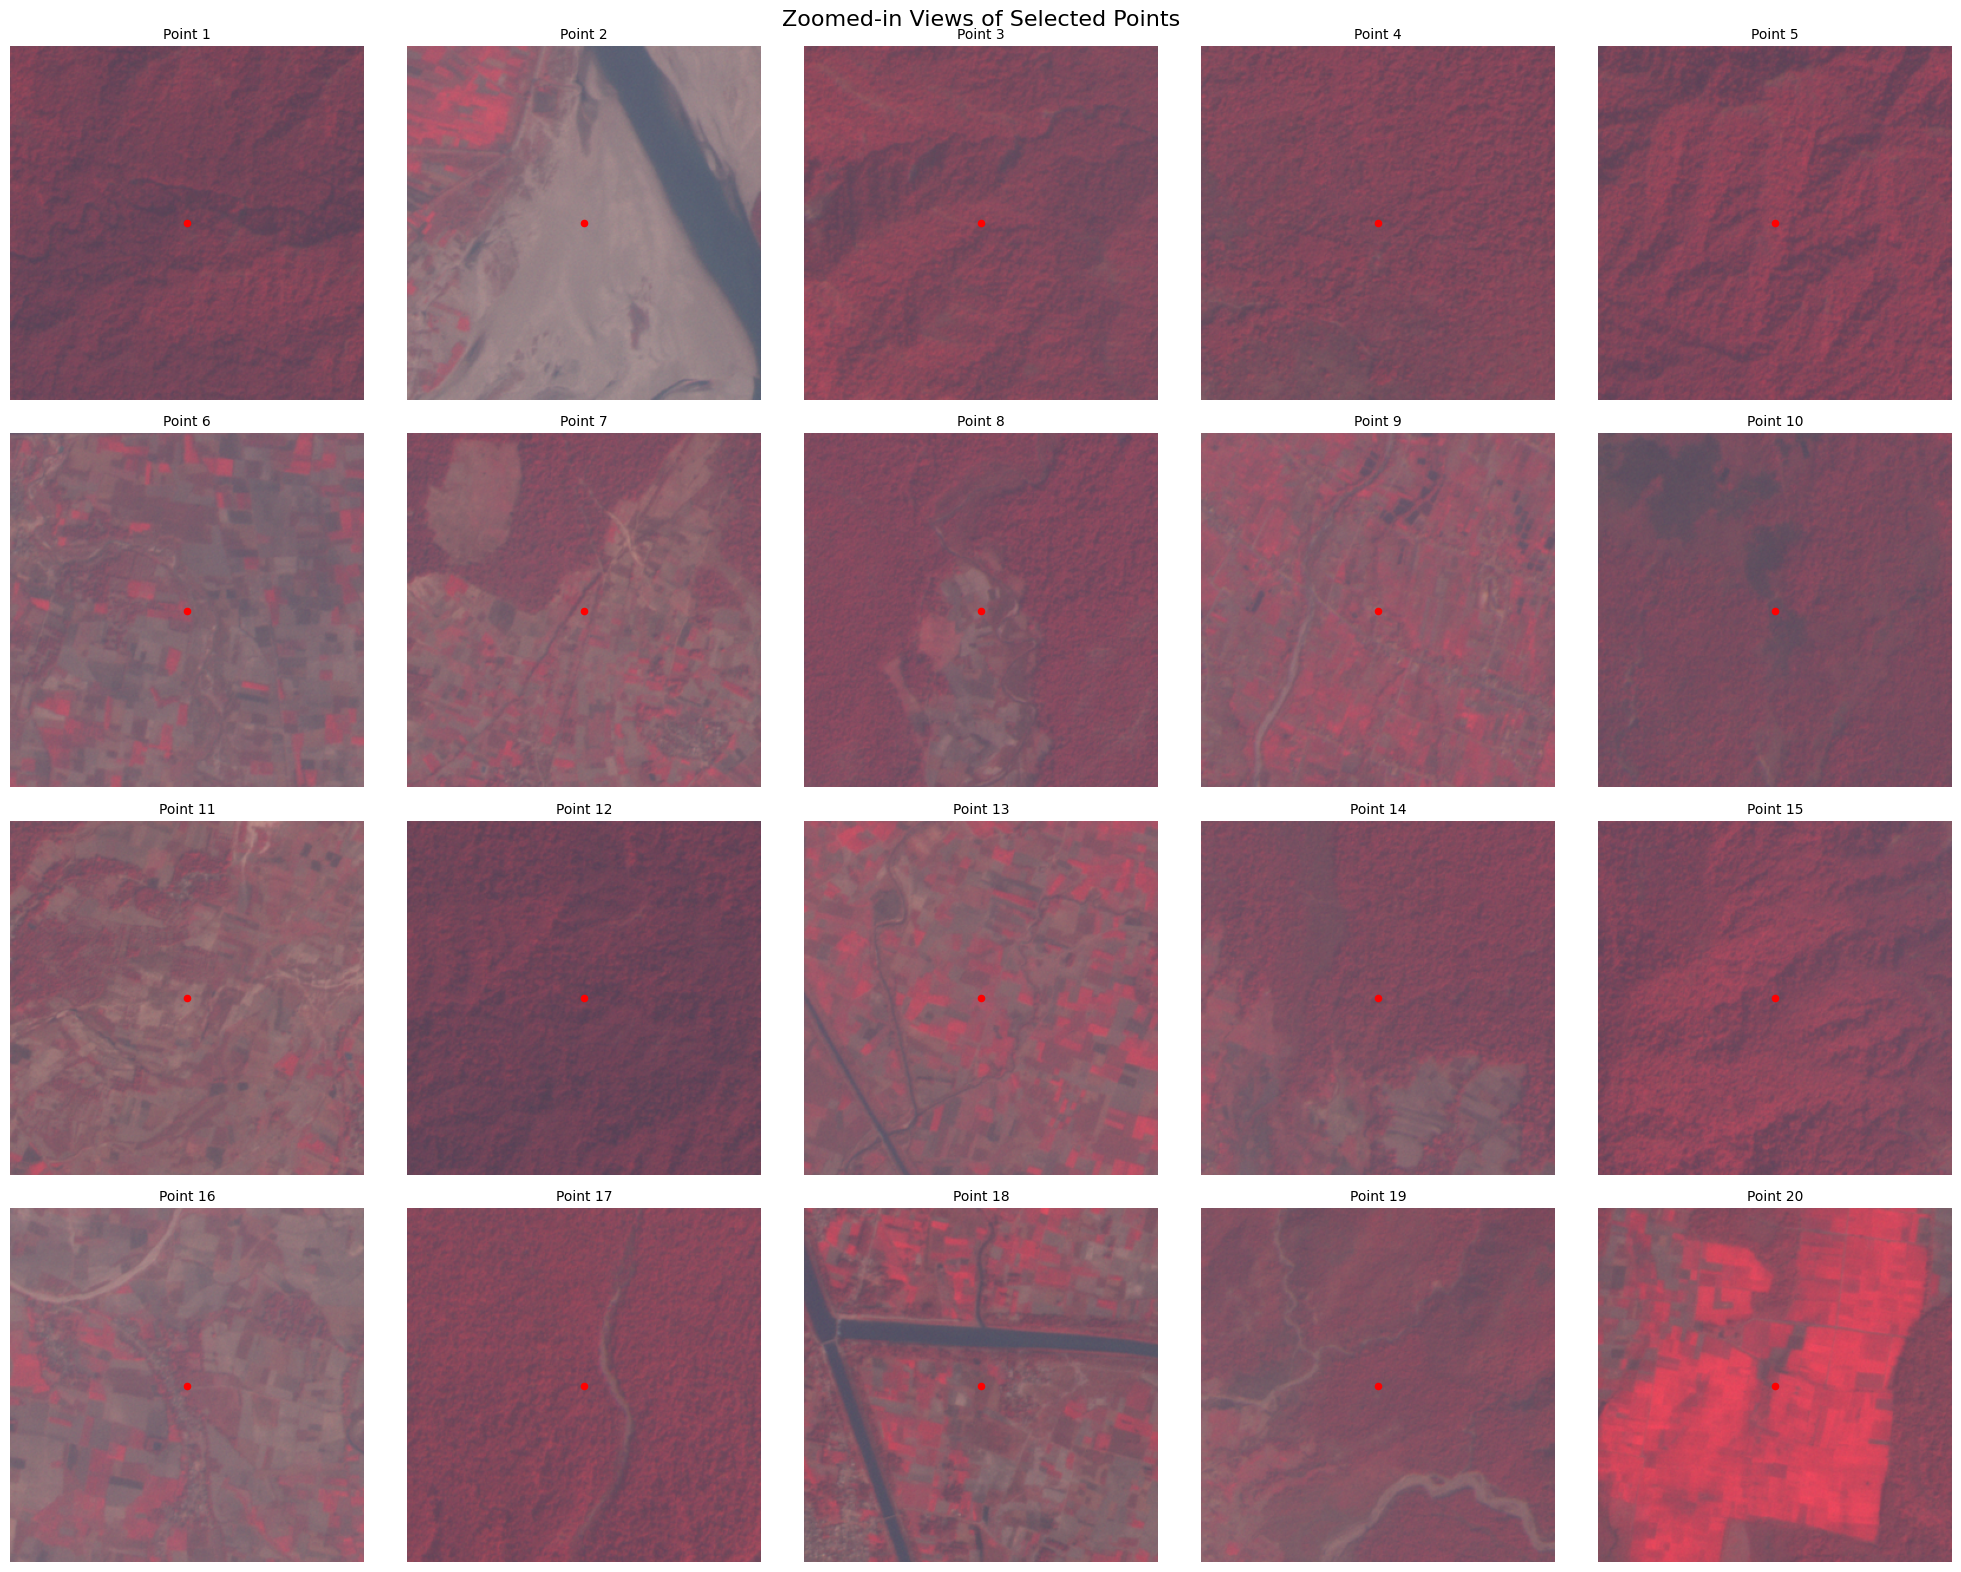

In [29]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load each band
band2 = rasterio.open('BAND2.tif').read(1)
band3 = rasterio.open('BAND3.tif').read(1)
band4 = rasterio.open('BAND4.tif').read(1)

# Stack bands to create false color composite
image_stack = np.dstack((band4, band3, band2))  # Band4=NIR, Band3=Red, Band2=Green

# Define points (x, y coordinates) - add as many as you want!
points = [
    (10000, 2000),   # Point 1
    (5000, 3000),    # Point 2
    (6000, 250),     # Point 3
    (7000, 4000),    # Point 4
    (12000, 1000),   # Point 5
    (14000, 8000),   # Point 6
    (12000, 6000),   # Point 7
    (12000, 4500),   # Point 8
    (15000, 2500),   # Point 9
    (17000, 350),    # Point 10
    (8000, 5000),    # Point 11
    (9000, 1500),    # Point 12
    (10000, 7000),   # Point 13
    (11000, 3000),   # Point 14
    (13000, 2000),   # Point 15
    (16000, 6000),   # Point 16
    (18000, 1000),   # Point 17
    (4000, 4000),    # Point 18
    (5000, 1000),    # Point 19
    (4000, 6000)     # Point 20
]
window_size = 300  # Size of the zoomed-in area (600x600 pixels)

# === 1. Show Full Image with All Points ===
plt.figure(figsize=(12, 12))
plt.imshow(image_stack)
plt.title('False Color Composite (NIR-Red-Green) with Selected Points', fontsize=14)
plt.axis('off')

# Plot the points with numbers
for i, (x, y) in enumerate(points, start=1):
    plt.scatter(x, y, color='red', s=50)
    plt.text(x, y, str(i), color='white', ha='center', va='center', fontsize=10)

plt.show()

# === 2. Show Zoomed-in Subplots ===
num_points = len(points)
cols = 5  # Number of columns in subplot grid
rows = (num_points + cols - 1) // cols  # Calculate required rows

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
fig.suptitle('Zoomed-in Views of Selected Points', fontsize=16)

for i, (x, y) in enumerate(points, start=1):
    # Calculate crop boundaries
    x_min = max(0, x - window_size//2)
    x_max = min(image_stack.shape[1], x + window_size//2)
    y_min = max(0, y - window_size//2)
    y_max = min(image_stack.shape[0], y + window_size//2)
    
    # Crop the image
    cropped = image_stack[y_min:y_max, x_min:x_max]
    
    # Select subplot (handles 1D or 2D axes)
    if rows == 1:
        ax = axes[(i-1) % cols]
    else:
        ax = axes[(i-1) // cols, (i-1) % cols]
    
    ax.imshow(cropped)
    ax.set_title(f'Point {i}', fontsize=10)
    ax.axis('off')
    
    # Mark the exact point with a red dot
    point_x_in_crop = x - x_min
    point_y_in_crop = y - y_min
    ax.scatter(point_x_in_crop, point_y_in_crop, color='red', s=20)

# Hide unused subplots (if any)
for j in range(i, rows * cols):
    if rows == 1:
        axes[j % cols].axis('off')
    else:
        axes[j // cols, j % cols].axis('off')

plt.tight_layout()
plt.show()